   250     0.0
    500     0.0
   1000     0.1
   2000     0.7
   4000     5.4
   8000    43.4

Fitted parameters:[a, b]= [8.12590926e-11 3.00469963e+00]
Log-fitted parameters:[a, b]= [-9.78587524  2.92321863]


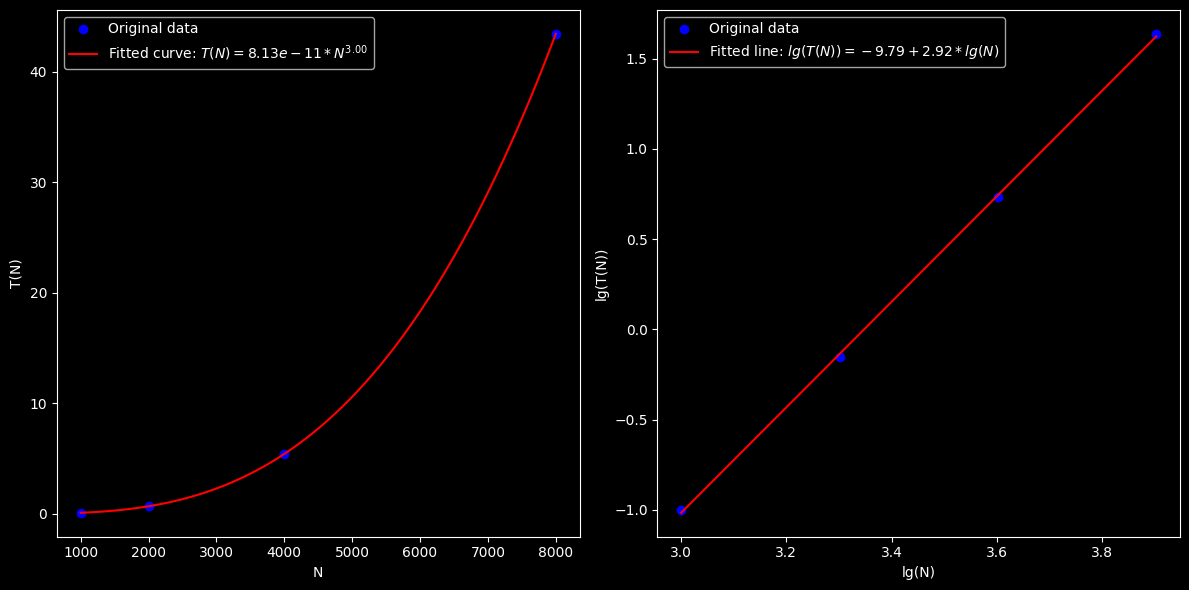

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 数据
N = np.array([ 1000, 2000, 4000, 8000])
timecost = np.array([ 0.1, 0.7, 5.4, 43.4])

# 定义一个模型函数, 你可以选择不同的函数形式进行拟合
# 例如我们尝试使用指数拟合模型
def model(x, a, b):
    # return a * np.exp(b * x) # a*e^(b*x)  aN^b
    return a * x**b     # 定义模型函数 T(N) = a * N^b

# 对N和timecost进行拟合
params, covariance = curve_fit(model, N, timecost)
print("Fitted parameters:[a, b]=", params)
# 生成拟合曲线
N_fine = np.linspace(1000, 8000, 100)
T_fitted = model(N_fine, *params)

# 绘制 N 和 T(N) 的拟合图
plt.figure(figsize=(12, 6))

# 第一个图: N 和 T(N)
plt.subplot(1, 2, 1)
plt.plot(N, timecost, 'bo', label='Original data')
plt.plot(N_fine, T_fitted, 'r-', label='Fitted curve: $T(N) = {:.2e} * N^{{{:.2f}}}$'.format(params[0], params[1]))
plt.xlabel('N')
plt.ylabel('T(N)')
plt.legend()

# 对数拟合
# 只对timecost中大于零的值进行对数转换
mask = timecost > 0
logN = np.log10(N[mask])
logT = np.log10(timecost[mask]) # 只对正的时间进行对数转换

def log_model(x, a, b):
    return a + b * x  # 线性模型 lg(T(N)) = a + b*lg(N)

# 对数拟合
params_log, _ = curve_fit(log_model, logN, logT)
print("Log-fitted parameters:[a, b]=", params_log)
# 绘制 对数图: lgN 和 lg(T(N))
plt.subplot(1, 2, 2)
plt.plot(logN, logT, 'bo', label='Original data')
plt.plot(logN, log_model(logN, *params_log), 'r-', label='Fitted line: $lg(T(N)) = {:.2f} + {:.2f} * lg(N)$'.format(params_log[0], params_log[1]))
plt.xlabel('lg(N)')
plt.ylabel('lg(T(N))')
plt.legend()

plt.tight_layout()
plt.show()


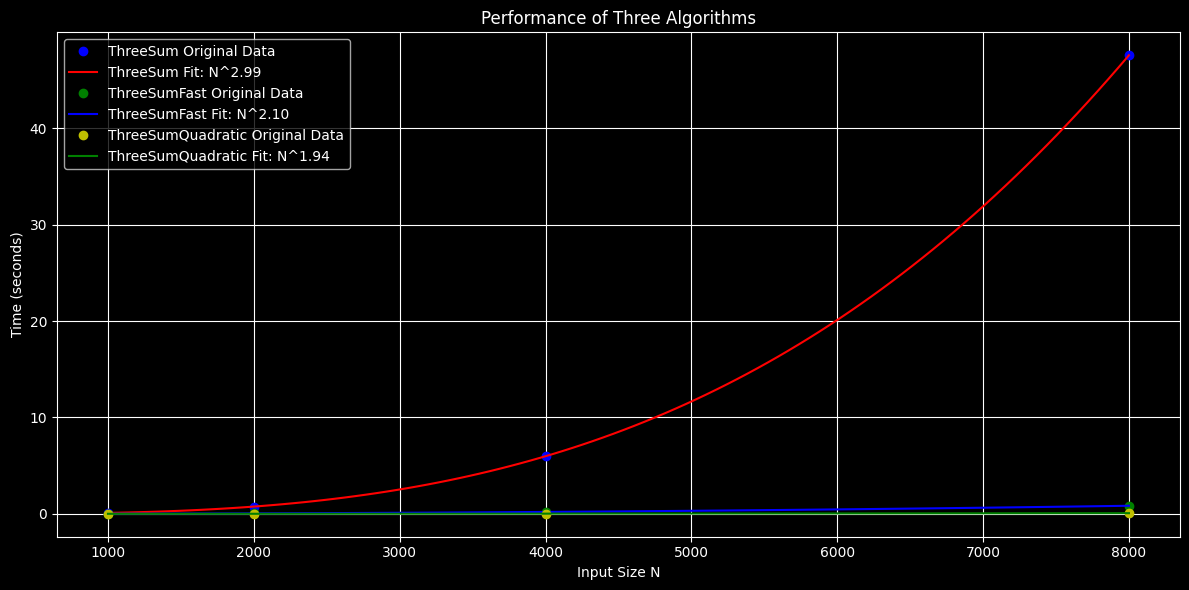

ThreeSum fit parameters (a, b): [9.86312756e-11 2.99335325e+00]
ThreeSumFast fit parameters (a, b): [5.44529367e-09 2.09723790e+00]
ThreeSumQuadratic fit parameters (a, b): [1.75906201e-09 1.93887999e+00]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 数据（N是输入大小，time是对应的时间）
N = np.array([1, 2, 4, 8]) * 1000  # 输入大小 1K, 2K, 4K, 8K
time_ThreeSum = np.array([0.1020, 0.7520, 5.9730, 47.5710])  # ThreeSum
time_ThreeSumFast = np.array([0.0130, 0.0430, 0.1960, 0.8350])  # ThreeSumFast
time_ThreeSumQuadratic = np.array([0.0020, 0.0040, 0.0170, 0.0650])  # ThreeSumQuadratic

# 定义拟合模型函数, 假设是 O(N^2) 或 O(N^3)，可以根据情况选择模型
def model(x, a, b):
    return a * x ** b  # 假设是 O(N^b)

# 对每个算法进行拟合
params_ThreeSum, _ = curve_fit(model, N, time_ThreeSum)
params_ThreeSumFast, _ = curve_fit(model, N, time_ThreeSumFast)
params_ThreeSumQuadratic, _ = curve_fit(model, N, time_ThreeSumQuadratic)

# 生成拟合曲线
N_fine = np.linspace(1000, 8000, 100)
time_ThreeSum_fitted = model(N_fine, *params_ThreeSum)
time_ThreeSumFast_fitted = model(N_fine, *params_ThreeSumFast)
time_ThreeSumQuadratic_fitted = model(N_fine, *params_ThreeSumQuadratic)

# 绘图
plt.figure(figsize=(12, 6))

# 绘制 ThreeSum
plt.plot(N, time_ThreeSum, 'bo', label='ThreeSum Original Data')
plt.plot(N_fine, time_ThreeSum_fitted, 'r-', label=f'ThreeSum Fit: N^{params_ThreeSum[1]:.2f}')

# 绘制 ThreeSumFast
plt.plot(N, time_ThreeSumFast, 'go', label='ThreeSumFast Original Data')
plt.plot(N_fine, time_ThreeSumFast_fitted, 'b-', label=f'ThreeSumFast Fit: N^{params_ThreeSumFast[1]:.2f}')

# 绘制 ThreeSumQuadratic
plt.plot(N, time_ThreeSumQuadratic, 'yo', label='ThreeSumQuadratic Original Data')
plt.plot(N_fine, time_ThreeSumQuadratic_fitted, 'g-', label=f'ThreeSumQuadratic Fit: N^{params_ThreeSumQuadratic[1]:.2f}')

# 配置图形
plt.xlabel('Input Size N')
plt.ylabel('Time (seconds)')
plt.legend()
plt.title('Performance of Three Algorithms')
plt.grid(True)

plt.tight_layout()
plt.show()

# 输出拟合参数
print(f"ThreeSum fit parameters (a, b): {params_ThreeSum}")
print(f"ThreeSumFast fit parameters (a, b): {params_ThreeSumFast}")
print(f"ThreeSumQuadratic fit parameters (a, b): {params_ThreeSumQuadratic}")
